### MAST30034: Applied Data Science Project 1
---
# Data Analysis: Modelling Average Trip Distance Over Time
#### Xavier Travers (1178369)

TODO: Modelling Average Trip Distance Over Time

In [1]:
# imports used throughout this notebook
from collections import defaultdict
from itertools import product
import os
import sys
from pyspark.sql import DataFrame, Column
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import geopandas

# add homemade helpers
sys.path.insert(1, '../../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

# path where the data files are stored
DATA_PATH = '../../data'

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/17 00:17:39 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.22.169.117 instead (on interface eth0)
22/08/17 00:17:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/17 00:17:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Grouped by Pick-Up Location

In [3]:
# read in the aggregated tlc by pickup data
tlc_pu_df = spark.read.parquet(f'{DATA_PATH}/curated/tlc/aggregated/yellow/by_pu')
tlc_pu_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,pu_borough,population,num_trips,num_pc_trips,num_p100k_trips,avg_passengers,avg_trip_distance
2020,9,2020-09-19,142,2,Brooklyn,2727393.0,2290,8.396296389995868E-4,83.96296389995868,1.3458515283842796,2.986074235807862
2021,2,2021-02-20,164,2,Manhattan,1576876.0,291970,0.1851572349379406,18515.72349379406,1.4186286262287222,2.1355327944651408
2020,9,2020-09-19,142,2,Staten Island,495522.0,39,7.870488091346096E-5,7.870488091346096,1.0,31.242307692307694
2021,1,2021-01-09,158,2,Staten Island,493494.0,55,1.114501898705962E-4,11.14501898705962,1.0363636363636364,30.25254545454545
2020,9,2020-09-26,143,2,Bronx,1466438.0,904,6.164597480425358E-4,61.64597480425357,1.3152654867256637,3.7580199115044257


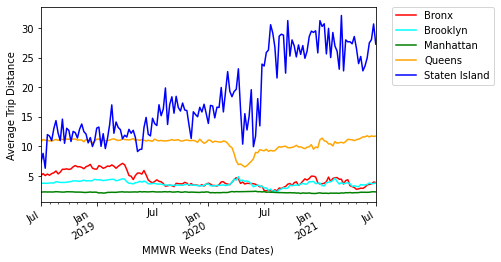

In [4]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_pu_df.toPandas(), 'avg_trip_distance', 
    ylabel = 'Average Trip Distance')

Note that there appears to be no data past March 2021.
This is likely due to 

### Grouped by Drop-Off Location

In [5]:
# read in the aggregated tlc by dropoff data
tlc_do_df = spark.read.parquet(f'{DATA_PATH}/curated/tlc/aggregated/yellow/by_do')
tlc_do_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,do_borough,population,num_trips,num_pc_trips,num_p100k_trips,avg_passengers,avg_trip_distance
2020,9,2020-09-19,142,2,Brooklyn,2727393.0,10312,0.003780899928979799,378.08999289797987,1.3926493405740885,7.116654383242838
2021,2,2021-02-20,164,2,Manhattan,1576876.0,283448,0.17975287847617694,17975.287847617696,1.4208038158674607,2.09422162089691
2020,9,2020-09-19,142,2,Staten Island,495522.0,88,1.775905005226811...,17.759050052268112,1.1931818181818181,22.14681818181818
2021,1,2021-01-09,158,2,Staten Island,493494.0,143,2.897704936635501E-4,28.97704936635501,1.2517482517482517,23.01216783216782
2020,9,2020-09-26,143,2,Bronx,1466438.0,3808,0.002596768496179177,259.6768496179177,1.3836659663865547,7.49887079831932


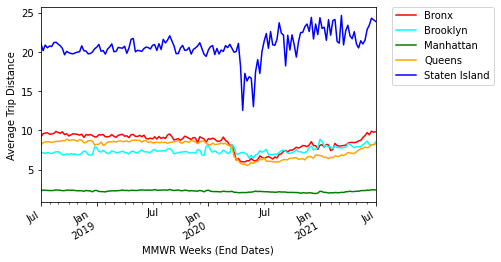

In [6]:
# generate a time series graph of daily avg trips vs week index.
ph.time_series(tlc_do_df.toPandas(), 'avg_trip_distance', 
    ylabel = 'Average Trip Distance')